In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


'## Read the dataset

In [4]:
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

In [5]:
train2 = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")

In [6]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


## Creating a professional approach to check the null values

In [8]:
def check_null(dataset):
    null_val = dataset.isnull().sum()
    print(f"The null values are")
    print(f"{null_val}")

In [9]:
check_null(train)

The null values are
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
check_null(test)

The null values are
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


## Remove the id column

In [11]:
train.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

In [12]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [13]:
test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [14]:
def analyze_dataframe(df):
    print("Dataframe Info:")
    print("++++++++++++++")
    display(df.info(verbose=True, show_counts=True))
    print("\n")
    
    print("Dataframe Values:")
    print("++++++++++++++")
    display(df.head(10))
    print("\n")
    
    print("Number of Unique Values:")
    print("++++++++++++++")
    display(df.nunique())
    print("\n")
    
    print("Number of Null Values:")
    print("++++++++++++++")
    display(df.isnull().sum())
    print("\n")
    
    print("Database Description:")
    print("++++++++++++++")
    display(df.describe())
    print("\n")

In [15]:
analyze_dataframe(train)

Dataframe Info:
++++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


None



Dataframe Values:
++++++++++++++


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0




Number of Unique Values:
++++++++++++++


CustomerId         23221
Surname             2797
CreditScore          457
Geography              3
Gender                 2
Age                   71
Tenure                11
Balance            30075
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55298
Exited                 2
dtype: int64



Number of Null Values:
++++++++++++++


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64



Database Description:
++++++++++++++


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Adding more features to dataset

In [16]:
# Balance to Salary Ratio
train['Bal_to_Sal_Ratio'] = train['Balance'] / train['EstimatedSalary']
test['Bal_to_Sal_Ratio'] = test['Balance'] / test['EstimatedSalary']

#Age and balance interaction term
train['Age_balance'] = train['Age'] * train['Balance']
test['Age_balance'] = test['Age'] * test['Balance']

#Combined effect of balance and Number of Products on churn
train['Balance_to_Product'] = train['Balance'] * train['NumOfProducts']
test['Balance_to_Product'] = test['Balance'] * test['NumOfProducts']

## As everything is cool, let's start with Exploratory Data Analysis

In [17]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000,0.00,0.00
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000,0.00,0.00
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000,0.00,0.00
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655,5062006.36,148882.54
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000,0.00,0.00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Geography', ylabel='Count'>

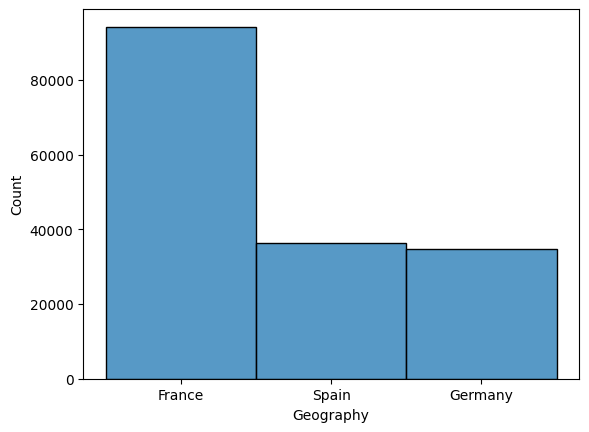

In [18]:
sns.histplot(data=train, x='Geography', bins=100)

> This shows that maximum people who have brought the card are from france

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Exited', ylabel='Count'>

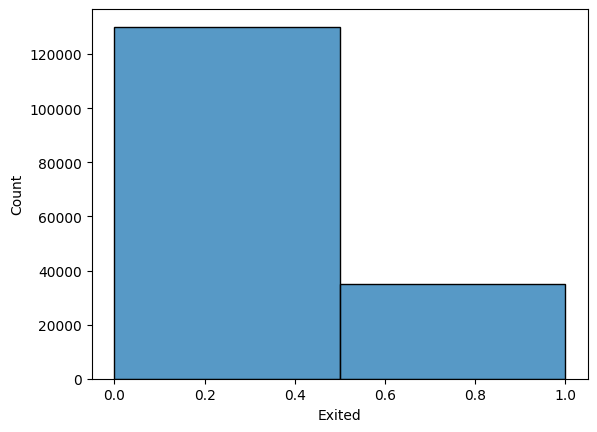

In [19]:
sns.histplot(data=train, x='Exited', bins=2)

> Number of people who exited are more than 1,20,000

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

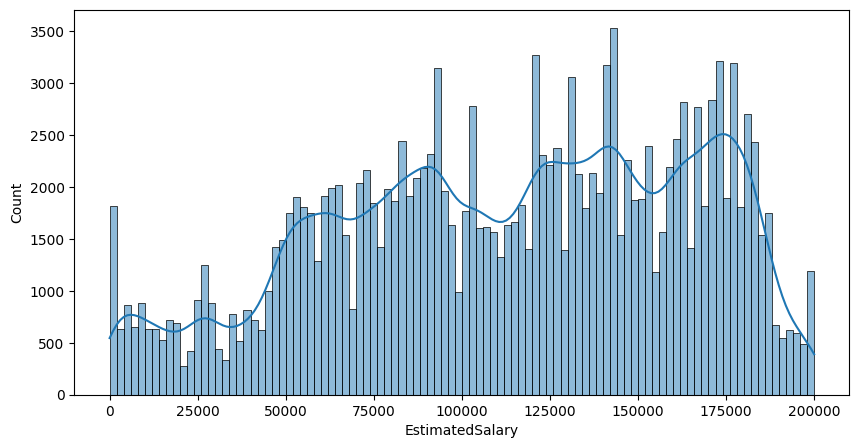

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='EstimatedSalary', bins=100, kde=True)

> With this we can compare and judge the highest and lowest salary

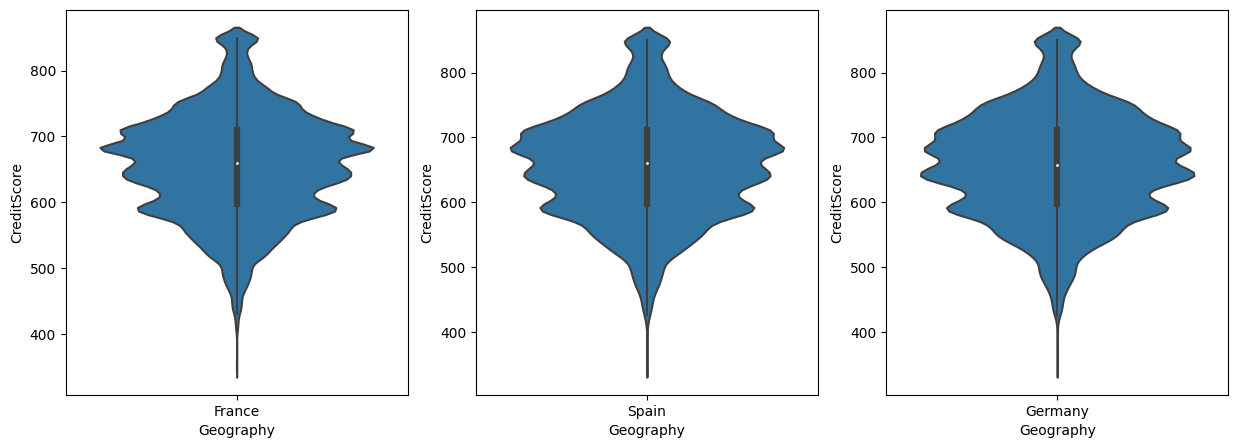

In [21]:
geo_category = ['France', 'Spain', 'Germany']
fig, axes = plt.subplots(1,3, figsize=(15,5))
for i, cat in enumerate (geo_category):
    sns.violinplot(data=train[train['Geography'] == cat], x='Geography', y='CreditScore', ax = axes[i])

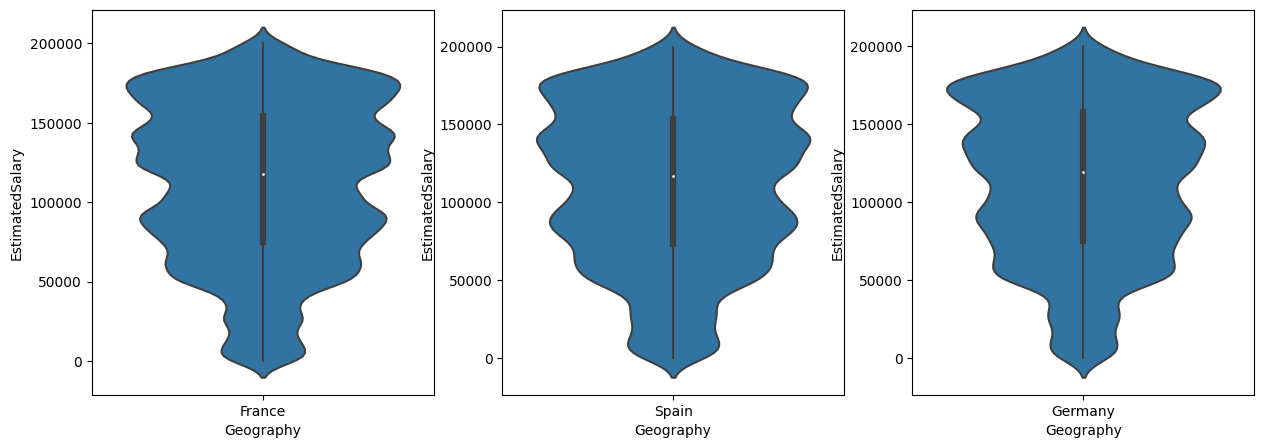

In [22]:
geo_category = ['France', 'Spain', 'Germany']
fig, axes = plt.subplots(1,3, figsize=(15,5))
for i, cat in enumerate (geo_category):
    sns.violinplot(data=train[train['Geography'] == cat], x='Geography', y='EstimatedSalary', ax = axes[i])

<Axes: xlabel='CreditScore'>

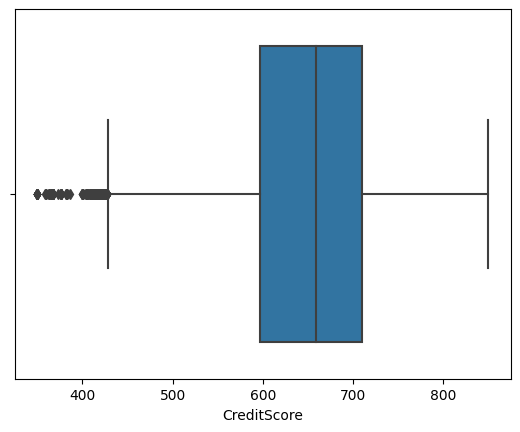

In [23]:
sns.boxplot(data=train, x='CreditScore')

In [24]:
num_types = train.select_dtypes(include = ["float64", 'int64'])
corr_matrix = num_types.corr().sort_values(ascending=True, by='Exited')

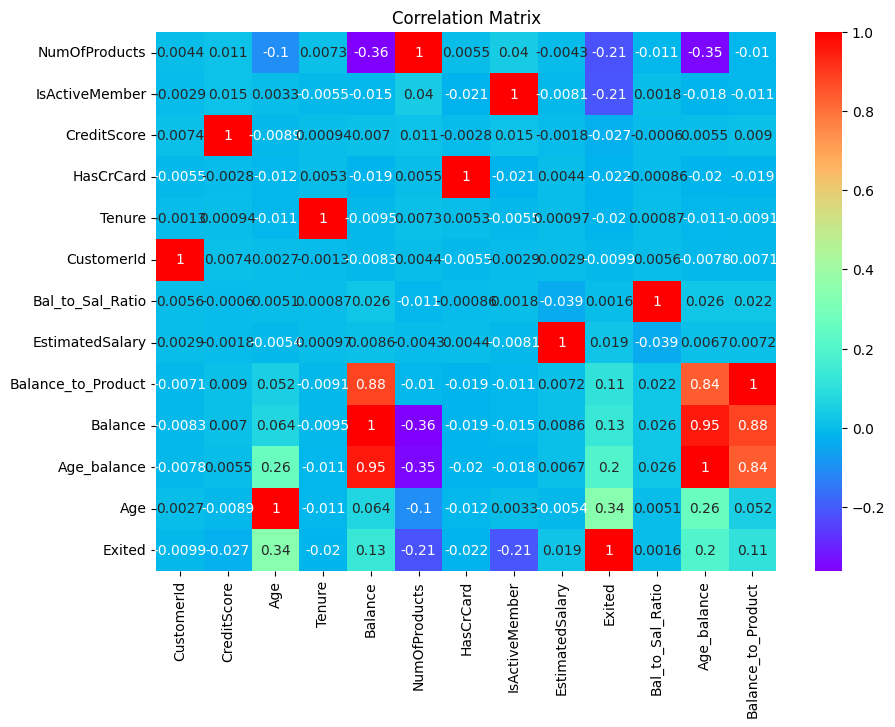

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title("Correlation Matrix")
plt.show()

> This correlation matirix is sorted according to the value of "Exited"

## Now import the machine learning libraries

In [26]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score, classification_report, roc_auc_score

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


> 1. Firstly prepare the dataset

In [27]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000,0.00,0.00
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000,0.00,0.00
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000,0.00,0.00
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655,5062006.36,148882.54
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000,0.00,0.00


In [28]:
train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000,0.00,0.00
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000,0.00,0.00
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000,0.00,0.00
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655,5062006.36,148882.54
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000,0.00,0.00


In [29]:
train = train.drop(['Surname', 'CustomerId'], axis=1)
test_ids = test['CustomerId']
test = test.drop(['Surname', 'CustomerId'], axis=1)

In [30]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000,0.00,0.00
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000,0.00,0.00
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000,0.00,0.00
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655,5062006.36,148882.54
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000,0.00,0.00


In [31]:
test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0.000000,0.00,0.00
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0.000000,0.00,0.00
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0.000000,0.00,0.00
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0.000000,0.00,0.00
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.869703,4608017.56,121263.62


In [32]:
num_cols = test.select_dtypes(include=['int', 'float']).columns

In [33]:
scaler = StandardScaler()

In [34]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.000000,0.00,0.00
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.000000,0.00,0.00
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.000000,0.00,0.00
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1.760655,5062006.36,148882.54
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.000000,0.00,0.00


In [35]:
test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0.000000,0.00,0.00
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0.000000,0.00,0.00
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0.000000,0.00,0.00
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0.000000,0.00,0.00
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.869703,4608017.56,121263.62


In [36]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
categorical_feat = ["Geography", "Gender", "Tenure", "HasCrCard", "IsActiveMember"]
for cat_feat in categorical_feat:
    train[cat_feat] = enc.fit_transform(train[cat_feat])
    test[cat_feat] = enc.fit_transform(test[cat_feat])

In [37]:
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,668,0,1,33.0,3,0.00,2,1,0,181449.97,0,0.000000,0.00,0.00
1,627,0,1,33.0,1,0.00,2,1,1,49503.50,0,0.000000,0.00,0.00
2,678,0,1,40.0,10,0.00,2,1,0,184866.69,0,0.000000,0.00,0.00
3,581,0,1,34.0,2,148882.54,1,1,1,84560.88,0,1.760655,5062006.36,148882.54
4,716,2,1,33.0,5,0.00,2,1,1,15068.83,0,0.000000,0.00,0.00


In [38]:
test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Bal_to_Sal_Ratio,Age_balance,Balance_to_Product
0,586,0,0,23.0,2,0.00,2,0,1,160976.75,0.000000,0.00,0.00
1,683,0,0,46.0,2,0.00,1,1,0,72549.27,0.000000,0.00,0.00
2,656,0,0,34.0,7,0.00,2,1,0,138882.09,0.000000,0.00,0.00
3,681,0,1,36.0,8,0.00,1,1,0,113931.57,0.000000,0.00,0.00
4,752,1,1,38.0,10,121263.62,1,1,0,139431.00,0.869703,4608017.56,121263.62


> Perform train, test split

In [43]:
X = train.drop('Exited', axis=1).values
y = train['Exited'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.fit_transform(X_test)
y_train_trans = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_trans = scaler.fit_transform(y_test.reshape(-1, 1))

## Since we are using GradientBoostingClassifier, XGBClassifier, LogisticRegression, CatBoostClassifier & LGBMClassifier thus we will first use optuna to find the best parameters and then we will use Voting Classifier for the optimal result

In [ ]:
def objective_gb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
        'min_samples_split': trial.suggest_uniform('min_samples_split', 0, 1),
        'min_samples_leaf': trial.suggest_uniform('min_samples_leaf', 0, 1),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])        
    }
    
    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=100)
best_params_gb = study_gb.best_trial.params
print("Best Hyperparameter: ", best_params_gb)

In [ ]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),        
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100)
best_params_xgb = study_xgb.best_trial.params
print("Best Hyperparameter:", best_params_xgb)

In [ ]:
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 16),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 3, 20),
        'subsample': trial.suggest_float('subsample', 0, 1),
#         'eval_metric': trial.suggest_categorical('eval_metric', ['logloss', 'rmse', 'auc']),
    }
    
    model = CatBoostClassifier(**params, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(objective_catboost, n_trials=100)
best_params_cat = study_catboost.best_trial.params
print("Best Hyperparameter:", best_params_cat)

[I 2024-01-23 17:33:27,562] A new study created in memory with name: no-name-b8364ad6-8ec6-49b1-9b26-37feb141f561
/tmp/ipykernel_42/713212350.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
[I 2024-01-23 17:33:38,443] Trial 0 finished with value: 0.8667555367043355 and parameters: {'iterations': 431, 'learning_rate': 0.013828007688049518, 'depth': 8, 'subsample': 0.13454445567875495}. Best is trial 0 with value: 0.8667555367043355.
/tmp/ipykernel_42/713212350.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
[I 2024-01-23 17

In [ ]:
def objective_lgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0, 1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
    }
    model = LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=100)
best_params_lgbm = study_lgbm.best_trial.params
print("Best Hyperparameter:", best_params_lgbm)

In [ ]:
lgbm = LGBMClassifier(**best_params_lgbm)
catb = CatBoostClassifier(**best_params_catb)
xgb = XGBClassifier(**best_params_xgb)
gb = GradientBoostingClassifier(**best_params_gb)

In [ ]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('lgbm', lgbm), ('catb', catb), ('xgb', xgb), ('gb', gb)], voting='soft')

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
kf = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=42)

In [ ]:
test.head()

In [ ]:
auc_score = []
submission_predictions=[]
X_test = test
for train_index, test_index in kf.split(X, y):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[test_index]
    
    vote.fit(X_train_kf, y_train_kf)
    
    y_pred_val = vote.predict_proba(X_val_kf)[:, 1]
    
    auc_val = roc_auc_score(y_val_kf, y_pred_val)
    auc_score.append(auc_val)
    
    y_pred_test = vote.predict_proba(X_test)[:, 1]
    submission_predictions.append(y_pred_test)

In [ ]:
for i, score in enumerate(auc_score):
    print(f"AUC for validation set {i}: {score}")

avg_submission = pd.DataFrame(submission_predictions).mean(axis=0)
submission['Exited'] = avg_submission

submission.to_csv("submission.csv", index=False)
submission.head()

In [ ]:
submission.isnull().sum()